# Using `mylibrary` (linear maps)

### Importing

In [1]:
from sys import path
from os.path import abspath

# Tell python to search for the files and modules starting from the working directory
module_path = abspath('..')
if module_path not in path:
    path.append(module_path)

Note: If we don't want to be telling Python where to search for our library, we can install it (in editable mode) in our conda environment using
```console
pip install -e .
```

In [2]:
import numpy as np

from mylibrary import Vector, LinearMap, Rotation, Shear

Import matplotlib stuff and adjust some basic settings

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


### Using `mylibrary.linearmap`

As a first example, we will see what happens if we try to initialize the abstract class `LinearMap`

In [4]:
matrix = [[1,0],[1,2]]
matrix_map = LinearMap(matrix) 

TypeError: Can't instantiate abstract class LinearMap with abstract method _get_inverse

As we can see, since the method `_get_inverse()` is not defined, the class cannot be instantiated.

On the contrary, there is no problem initializing a `Rotation` object:

In [6]:
angle = np.pi / 4
rotation = Rotation(angle)

We can see what happens if we apply this rotation and its inverse to a vector

In [19]:
vector = Vector(1, 1)
rot_vector = rotation(vector)
inv_rot_vector = rotation.inverse(vector)

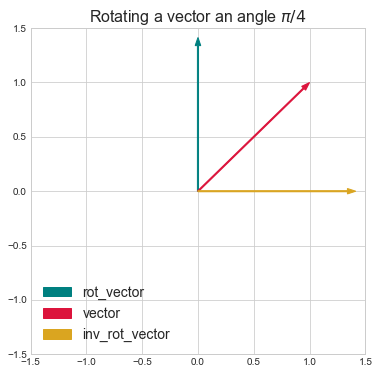

In [21]:
fig, ax = plt.subplots(figsize = (6, 6))
arrow_kwargs = {
    'width': 0.01,
    'head_width': 0.05,
    'length_includes_head': True,
    }
ax.arrow(0, 0, rot_vector.x, rot_vector.y, color='teal', label='rot_vector', **arrow_kwargs)
ax.arrow(0, 0, vector.x, vector.y, color='crimson', label='vector', **arrow_kwargs)
ax.arrow(0, 0, inv_rot_vector.x, inv_rot_vector.y, color='goldenrod', label='inv_rot_vector', **arrow_kwargs)

ax.legend(loc='lower left', fontsize=14)
ax.set_title(r'Rotating a vector an angle $\pi/4$', fontsize=16)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.show()

In a similar fashion, we can apply a shear transformation to a vector

In [22]:
angle = np.pi / 4
shear_map = Shear(angle)

vector = Vector(1, 1)
shear_vector = shear_map(vector)
inv_shear_vector = shear_map.inverse(vector)

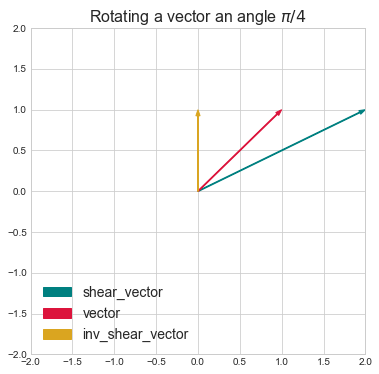

In [24]:
fig, ax = plt.subplots(figsize = (6, 6))
arrow_kwargs = {
    'width': 0.01,
    'head_width': 0.05,
    'length_includes_head': True,
    }
ax.arrow(0, 0, shear_vector.x, shear_vector.y, color='teal', label='shear_vector', **arrow_kwargs)
ax.arrow(0, 0, vector.x, vector.y, color='crimson', label='vector', **arrow_kwargs)
ax.arrow(0, 0, inv_shear_vector.x, inv_shear_vector.y, color='goldenrod', label='inv_shear_vector', **arrow_kwargs)

ax.legend(loc='lower left', fontsize=14)
ax.set_title(r'Rotating a vector an angle $\pi/4$', fontsize=16)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

plt.show()